### IMPORTING ALL NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies_data = pd.read_csv('movies_initial.csv')
reviews_data = pd.read_csv('prepd_data.csv')

##### Understanding the dataset 

In [3]:
movies_data.head(1)

,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,language,country,awards,lastupdated,type
0,1,Carmencita,1894,NOT RATED,1 min,"Documentary, Short",NaN,William K.L. Dickson,NaN,Carmencita,...,5.9,1032.0,https://m.media-amazon.com/images/M/MV5BMjAzND...,Performing on what looks like a small wooden s...,Performing on what looks like a small wooden s...,NaN,USA,NaN,2015-08-26 00:03:45.040000000,movie


In [4]:
movies_data.columns

Index(['imdbID', 'title', 'year', 'rating', 'runtime', 'genre', 'released',
       'director', 'writer', 'cast', 'metacritic', 'imdbRating', 'imdbVotes',
       'poster', 'plot', 'fullplot', 'language', 'country', 'awards',
       'lastupdated', 'type'],
      dtype='object')

In [5]:
movies_data.shape

(46014, 21)

In [6]:
reviews_data.head(2)

,Unnamed: 0,review,sentiment,sentiment_label
0,0,one review mention watch oz episod hook right ...,positive,1
1,1,wonder littl product film techniqu unassum old...,positive,1


In [7]:
reviews_data.columns

Index(['Unnamed: 0', 'review', 'sentiment', 'sentiment_label'], dtype='object')

In [8]:
reviews_data.shape

(50000, 4)

In [9]:
reviews_data = reviews_data[1:46015]

##### Merging the dataset and combine in one csv file

In [10]:
movies = pd.concat([movies_data, reviews_data], axis=1)

In [11]:
movies = movies[1:46015]

#### Done Dataset

##### Data Cleaning & Data Preprocessing


In [12]:
movies.head()

,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,fullplot,language,country,awards,lastupdated,type,Unnamed: 0,review,sentiment,sentiment_label
1,5.0,Blacksmith Scene,1893,UNRATED,1 min,Short,1893-05-09,William K.L. Dickson,NaN,"Charles Kayser, John Ott",...,A stationary camera looks at a large anvil wit...,NaN,USA,1 win.,2015-08-26 00:03:50.133000000,movie,1.0,wonder littl product film techniqu unassum old...,positive,1.0
2,3.0,Pauvre Pierrot,1892,NaN,4 min,"Animation, Comedy, Short",1892-10-28,�mile Reynaud,NaN,NaN,...,"One night, Arlequin come to see his lover Colo...",NaN,France,NaN,2015-08-12 00:06:02.720000000,movie,2.0,thought wonder way spend time hot summer weeke...,positive,1.0
3,8.0,Edison Kinetoscopic Record of a Sneeze,1894,NaN,1 min,"Documentary, Short",1894-01-09,William K.L. Dickson,NaN,Fred Ott,...,A man (Edison's assistant) takes a pinch of sn...,NaN,USA,NaN,2015-08-10 00:21:07.127000000,movie,3.0,basic famili littl boy jake think zombi closet...,negative,0.0
4,10.0,Employees Leaving the Lumi�re Factory,1895,NaN,1 min,"Documentary, Short",1895-03-22,Louis Lumi�re,NaN,NaN,...,A man opens the big gates to the Lumi�re facto...,NaN,France,NaN,2015-08-26 00:03:56.603000000,movie,4.0,petter mattei love time money visual stun film...,positive,1.0
5,12.0,The Arrival of a Train,1896,NaN,1 min,"Documentary, Short",1896-01-01,"Auguste Lumi�re, Louis Lumi�re",NaN,NaN,...,A group of people are standing in a straight l...,NaN,France,NaN,2015-08-15 00:02:53.443000000,movie,5.0,probabl time favorit movi stori selfless sacri...,positive,1.0


#### Dimentinality Reduction
##### Removing Unnecessary Columns Means Extracting the columns

In [13]:
movies.columns

Index(['imdbID', 'title', 'year', 'rating', 'runtime', 'genre', 'released',
       'director', 'writer', 'cast', 'metacritic', 'imdbRating', 'imdbVotes',
       'poster', 'plot', 'fullplot', 'language', 'country', 'awards',
       'lastupdated', 'type', 'Unnamed: 0', 'review', 'sentiment',
       'sentiment_label'],
      dtype='object')

In [14]:
#Extracting Columns names
# ['year', 'rating', 'runtime', 'genre', 'released',       'director', 'writer', 'cast', 'metacritic', 'imdbRating', 'imdbVotes',
#  'poster', 'plot', 'fullplot', 'language', 'country', 'awards','lastupdated', 'type', 'Unnamed: 0']

In [15]:
movies = movies[['imdbID','title','review','sentiment','sentiment_label']]

In [16]:
movies['review'].nunique()

45664

#### overview of Dataset Before EDA

In [17]:
movies.describe()

,imdbID,sentiment_label
count,4.601300e+04,46014.000000
mean,8.552248e+05,0.500565
std,1.141984e+06,0.500005
min,1.000000e+00,0.000000
25%,8.166200e+04,0.000000
50%,2.524880e+05,1.000000
75%,1.370889e+06,1.000000
max,5.023260e+06,1.000000


In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46014 entries, 1 to 46014
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   imdbID           46013 non-null  float64
 1   title            46013 non-null  object 
 2   review           46014 non-null  object 
 3   sentiment        46014 non-null  object 
 4   sentiment_label  46014 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.8+ MB


In [19]:
# Missing Values
movies.isnull().sum()

imdbID             1
title              1
review             0
sentiment          0
sentiment_label    0
dtype: int64

In [20]:
# Duplicate valuse 
movies.duplicated().sum()

0

In [21]:
# conclusion: The dataset is well clean no need to change

#### Exploratory Data Analysis (EDA)

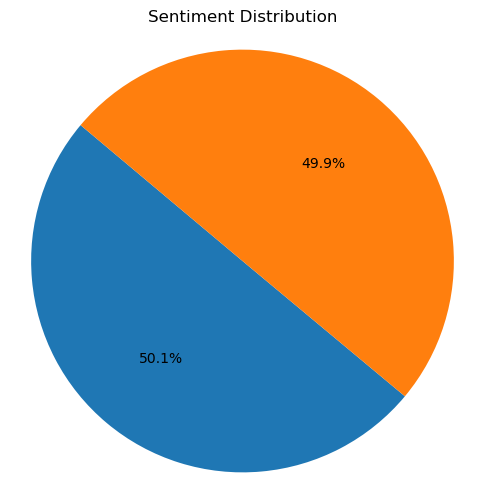

In [22]:
# Check the Sentiment Analysis data is baised or not with the help of pie chart
sentiment_count = movies['sentiment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_count, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal') 
plt.show()

In [23]:
# Con: There is no much difference in the dataset the data is balanced

##### Check the uniqe values Distribution in the form of barchart

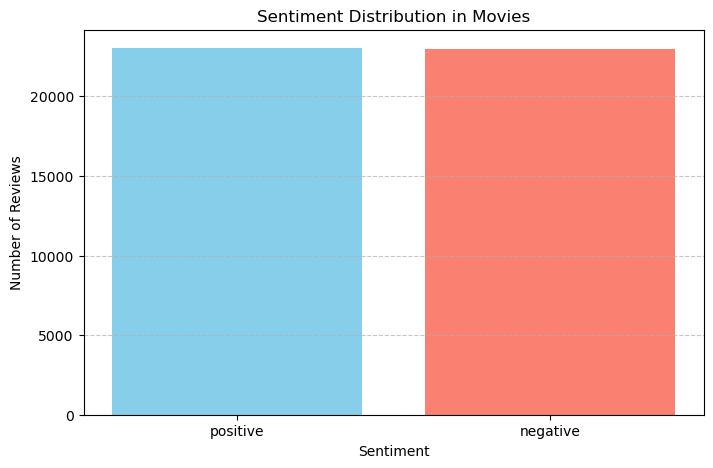

In [24]:
plt.figure(figsize=(8,5))
plt.bar(sentiment_count.index, sentiment_count.values, color=['skyblue', 'salmon'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution in Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
# you can clearly sea here there is no that much of difference

#### Data Preprocessing

In [26]:
import ast

In [27]:
movies['review'] #convert the data into list

1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic famili littl boy jake think zombi closet...
4        petter mattei love time money visual stun film...
5        probabl time favorit movi stori selfless sacri...
                               ...                        
46010    eisenstein one greatest soviet russian film di...
46011    scott bartlett offon nine minut pure crazi ful...
46012    moon child star japan rocker hyde gackt better...
46013    think time seagal go quietli night seen make d...
46014    sort thing thrill film egghead feierstein flex...
Name: review, Length: 46014, dtype: object

In [28]:
def string_column_to_list(df, column_name):
    df[column_name] = df[column_name].astype(str).apply(lambda x: x.split() if isinstance(x, str) else [])
    return df

In [29]:
movies = string_column_to_list(movies, 'review')


In [30]:
movies.review

1        [wonder, littl, product, film, techniqu, unass...
2        [thought, wonder, way, spend, time, hot, summe...
3        [basic, famili, littl, boy, jake, think, zombi...
4        [petter, mattei, love, time, money, visual, st...
5        [probabl, time, favorit, movi, stori, selfless...
                               ...                        
46010    [eisenstein, one, greatest, soviet, russian, f...
46011    [scott, bartlett, offon, nine, minut, pure, cr...
46012    [moon, child, star, japan, rocker, hyde, gackt...
46013    [think, time, seagal, go, quietli, night, seen...
46014    [sort, thing, thrill, film, egghead, feierstei...
Name: review, Length: 46014, dtype: object

In [31]:
# Build the function for some preprocessing

In [32]:
import pandas as pd
import string
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

def clean_review_column(df, column_name='review'):
    stop_words = set(stopwords.words('english'))
    punctuation_table = str.maketrans("", "", string.punctuation)

    def clean_review(word_list):
        return [
            word.lower().translate(punctuation_table)
            for word in word_list
            if word.lower().translate(punctuation_table) not in stop_words and word.strip() != ''
        ]

    # Apply cleaning function to each row in the review column
    df[column_name] = df[column_name].apply(clean_review)
    return df



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
movies = clean_review_column(movies, column_name='review')

In [34]:
movies.head(3)

,imdbID,title,review,sentiment,sentiment_label
1,5.0,Blacksmith Scene,"[wonder, littl, product, film, techniqu, unass...",positive,1.0
2,3.0,Pauvre Pierrot,"[thought, wonder, way, spend, time, hot, summe...",positive,1.0
3,8.0,Edison Kinetoscopic Record of a Sneeze,"[basic, famili, littl, boy, jake, think, zombi...",negative,0.0


In [35]:
movies['sentiment_label'] = movies['sentiment_label'].astype(int)

In [36]:
movies.head()

,imdbID,title,review,sentiment,sentiment_label
1,5.0,Blacksmith Scene,"[wonder, littl, product, film, techniqu, unass...",positive,1
2,3.0,Pauvre Pierrot,"[thought, wonder, way, spend, time, hot, summe...",positive,1
3,8.0,Edison Kinetoscopic Record of a Sneeze,"[basic, famili, littl, boy, jake, think, zombi...",negative,0
4,10.0,Employees Leaving the Lumi�re Factory,"[petter, mattei, love, time, money, visual, st...",positive,1
5,12.0,The Arrival of a Train,"[probabl, time, favorit, movi, stori, selfless...",positive,1


In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def stem(word_list):
    y = []
    for word in word_list:  
        y.append(ps.stem(word))
    return y


In [38]:
movies['review']= movies['review'].apply(stem)

In [39]:
movies['review'].head(1)

1    [wonder, littl, product, film, techniqu, unass...
Name: review, dtype: object

In [40]:
movies['review'] = movies['review'].apply(lambda x: ' '.join(x))

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, stop_words = 'english')

In [42]:
X = cv.fit_transform(movies['review']).toarray()

In [43]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 2, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
X.shape

(46014, 5000)

In [45]:
X[0].max()

2

In [46]:
X[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
y = movies.iloc[:,-1].values

In [48]:
y.shape

(46014,)

#### Show the Sentiment Analysis most used words as positive or Negative values both

In [50]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

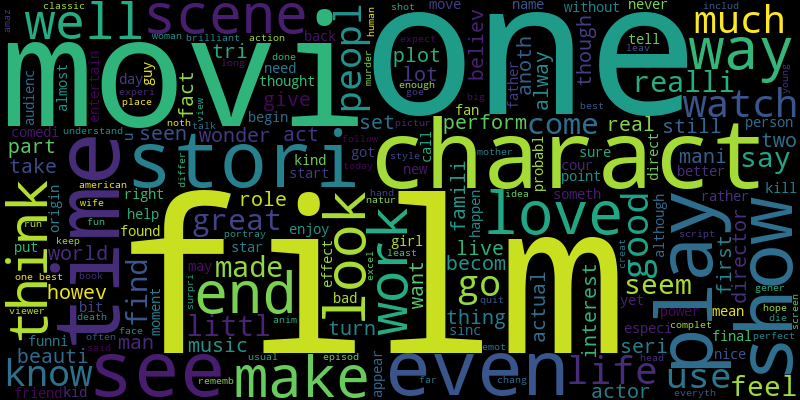

In [51]:
text = movies[movies['sentiment_label'] == 1]['review'].str.cat(sep=" ")
wc = WordCloud(width=800, height=400).generate(text)
wc.to_image()


In [52]:
Negative = wc.generate(movies[movies['sentiment_label']==0]['review'].str.cat(sep=""))

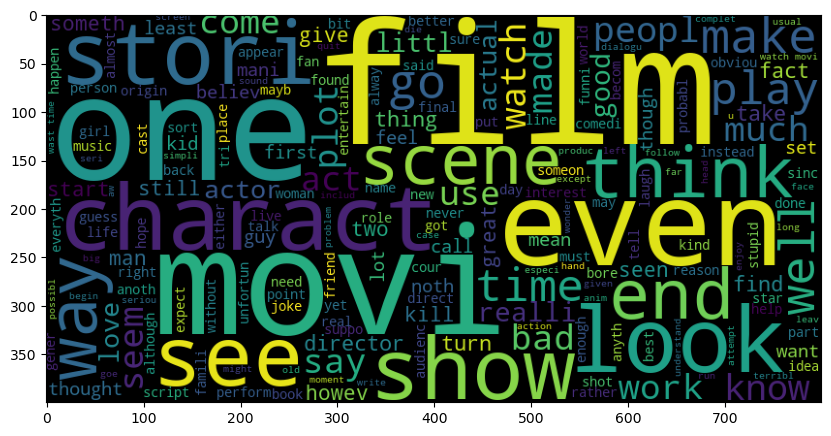

In [53]:
plt.figure(figsize=(10,6))
plt.imshow(Negative)

#### Devloping the Model

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [55]:
X_train.shape

(36811, 5000)

In [56]:
y_test.shape

(9203,)

##### Given the Requirement first use NaiveBayesAlgorithm

In [57]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [58]:
clf1 = GaussianNB()
clf2 = MultinomialNB()
clf3 = BernoulliNB()

In [59]:
print(clf1.fit(X_train,y_train))
print(clf2.fit(X_train, y_train))
print(clf3.fit(X_train, y_train))

GaussianNB()
MultinomialNB()
BernoulliNB()


In [60]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)

In [61]:
y_test.shape

(9203,)

In [62]:
y_pred1.shape

(9203,)

In [63]:
print("Gaussian",accuracy_score(y_test,y_pred1))
print("MultinomialNB",accuracy_score(y_test,y_pred2))
print("BernoulliNB",accuracy_score(y_test,y_pred3))

Gaussian 0.7149842442681734
MultinomialNB 0.8347278061501684
BernoulliNB 0.8367923503205477


#### And after used LogisticRegression

In [64]:
from sklearn.linear_model import LogisticRegression

In [70]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [71]:
clfs = {
    'lrc' : lrc, 
}

In [72]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [73]:
train_classifier(lrc,X_train,y_train,X_test,y_test)

(0.8660219493643377, 0.8583617747440273)

In [75]:
lrc.fit(X_train,y_train)
y_pred2 = lrc.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8660219493643377
[[3946  664]
 [ 569 4024]]
0.8583617747440273


#### Importing the File

In [76]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(lrc,open('model.pkl','wb'))

Web App Integration using streamlit